# Chapter 3: Managing and preparing data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
gapminder = pd.read_csv('../../data/gapminder.csv')

In [3]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# Exercises

1. How many countries start with the letter A?

In [4]:
df1 = gapminder.loc[gapminder['country'].str.startswith('A'), :]
print(df1['country'].unique())
len(df1['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Australia'
 'Austria']


7

In [5]:
[x for x in gapminder['country'].unique() if x.startswith('A')]

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria']

2. List all the countries and years when the life expectancy exceeded 70 years.

In [6]:
df2 = gapminder.loc[gapminder['lifeExp'] > 70, :]
df2['country'].unique()

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Finland',
       'France', 'Germany', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong, China', 'Hungary', 'Iceland', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait', 'Lebanon', 'Libya',
       'Malaysia', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Reunion', 'Romania', 'Saudi Arabia', 'Serbia',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Spain', 'Sri Lanka',
       'Sweden', 'Switzerland', 'Syria', '

3. Create a variable termed $\textbf{totalGDP}$ which is the product of average GDP per capita ($\textbf{gdpPercap}$) and population $\textbf{pop}$. Compute the sum of the $\textbf{totalGDP}$ for each year and plot it. What does the plot reveal?

In [7]:
gapminder['totalGDP'] = gapminder['gdpPercap'] * gapminder['pop']

In [8]:
df3 = gapminder.groupby('year').agg({'totalGDP': 'sum'}).reset_index()
df3

,year,totalGDP
0,1952,7.037689e+12
1,1957,8.896268e+12
2,1962,1.100437e+13
3,1967,1.424809e+13
4,1972,1.842143e+13
5,1977,2.231820e+13
6,1982,2.538199e+13
7,1987,3.013280e+13
8,1992,3.450091e+13
9,1997,4.100608e+13


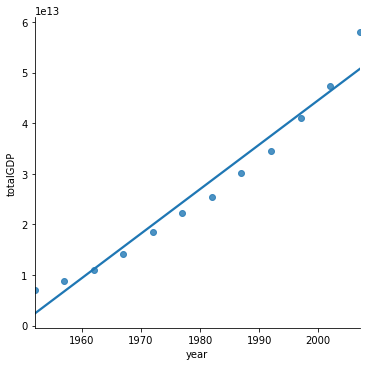

In [9]:
sns.lmplot(x='year', y='totalGDP', data=df3, ci=None)
plt.show()

4. For each continent, compute the average life expectancy, average GDP per capita, and the average population over the years. Create an appropriate plot to visualize the data.

In [10]:
df4 = gapminder.groupby(['continent', 'year']).agg({'lifeExp': 'mean', 'gdpPercap': 'mean', 'pop': 'mean'}).reset_index()
df4.head()

,continent,year,lifeExp,gdpPercap,pop
0,Africa,1952,39.135500,1252.572466,4.570010e+06
1,Africa,1957,41.266346,1385.236062,5.093033e+06
2,Africa,1962,43.319442,1598.078825,5.702247e+06
3,Africa,1967,45.334538,2050.363801,6.447875e+06
4,Africa,1972,47.450942,2339.615674,7.305376e+06


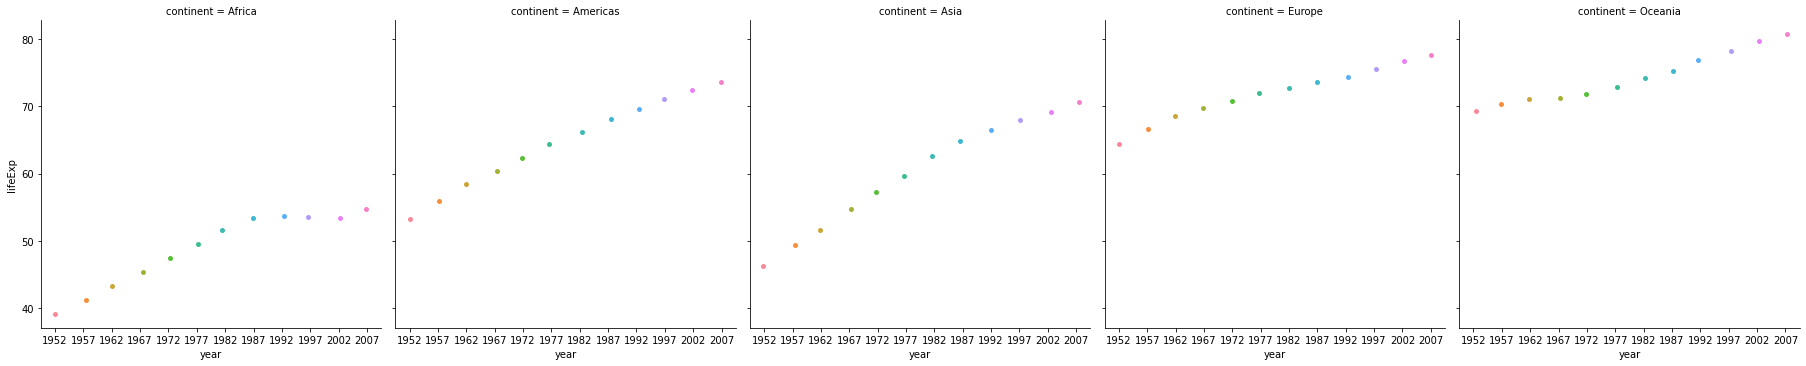

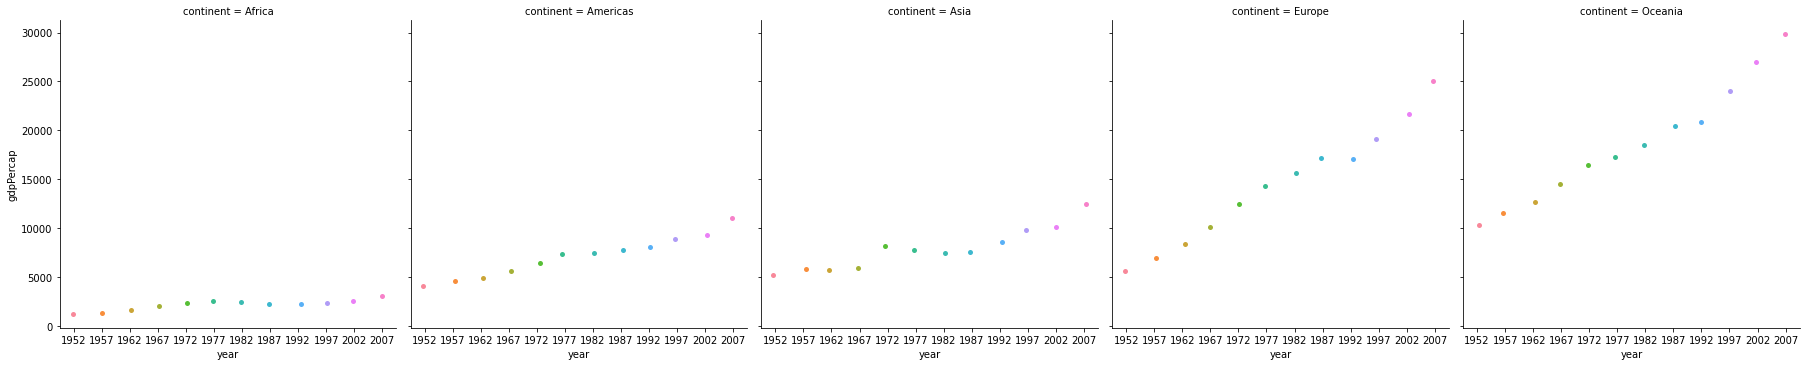

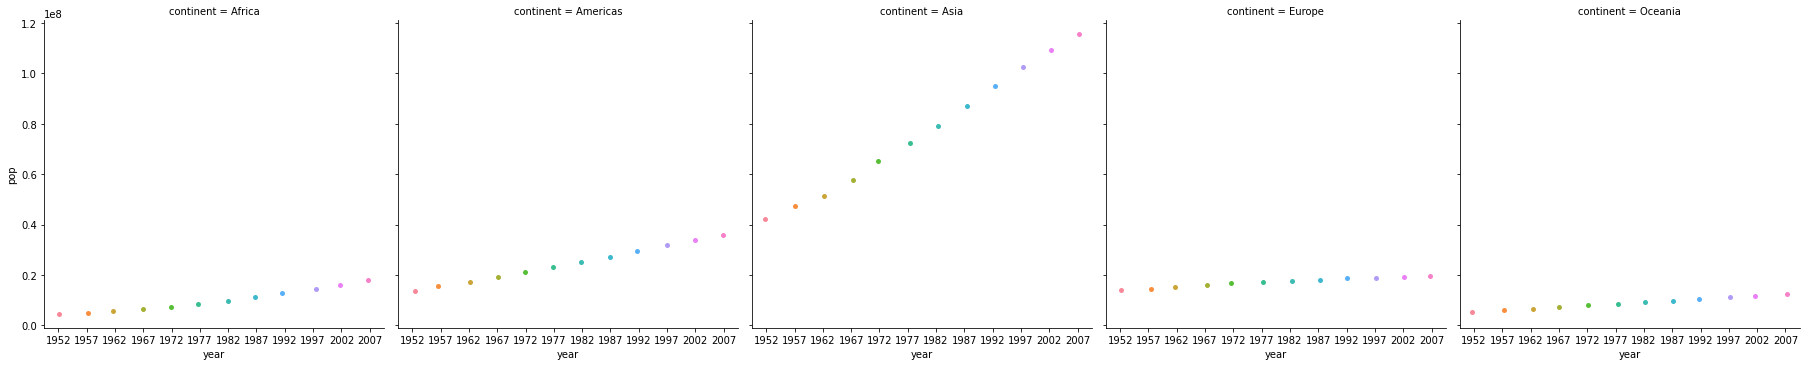

In [11]:
sns.catplot(x='year', y='lifeExp', col='continent', data=df4)
sns.catplot(x='year', y='gdpPercap', col='continent', data=df4)
sns.catplot(x='year', y='pop', col='continent', data=df4)
plt.show()

5. Calculate the total population for each continent for each year. Create an appropriate plot to visualize the data.

In [12]:
df5 = gapminder.groupby(['continent', 'year']).agg({'pop': 'sum'}).reset_index()
df5.head()

,continent,year,pop
0,Africa,1952,237640501
1,Africa,1957,264837738
2,Africa,1962,296516865
3,Africa,1967,335289489
4,Africa,1972,379879541


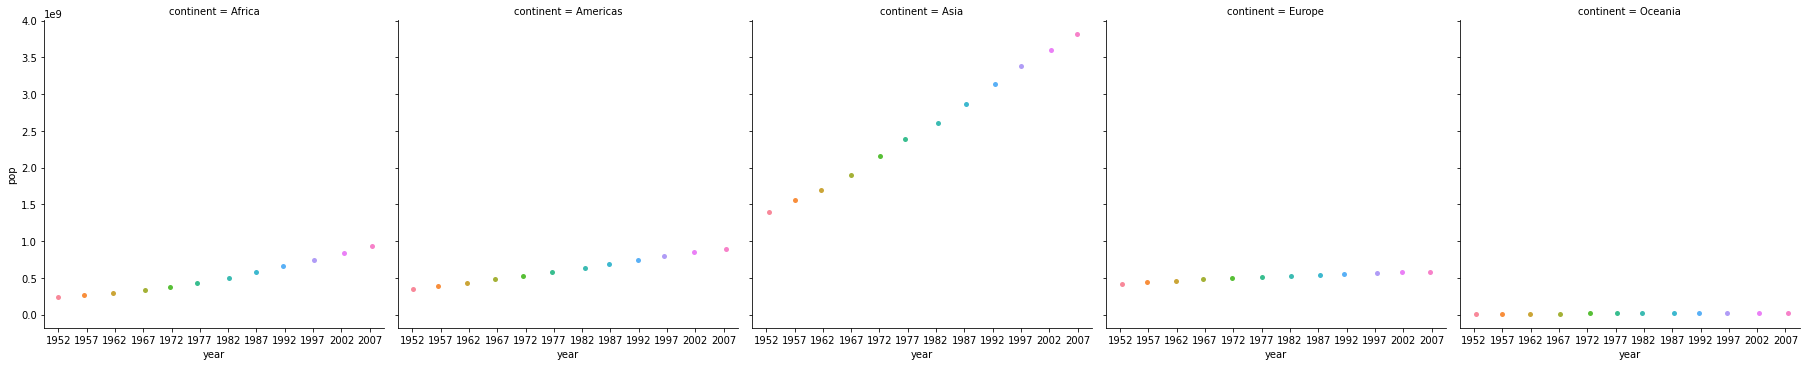

In [13]:
sns.catplot(x='year', y='pop', col='continent', data=df5)
plt.show()

6. Reshape the data so that the years are listed in columns.

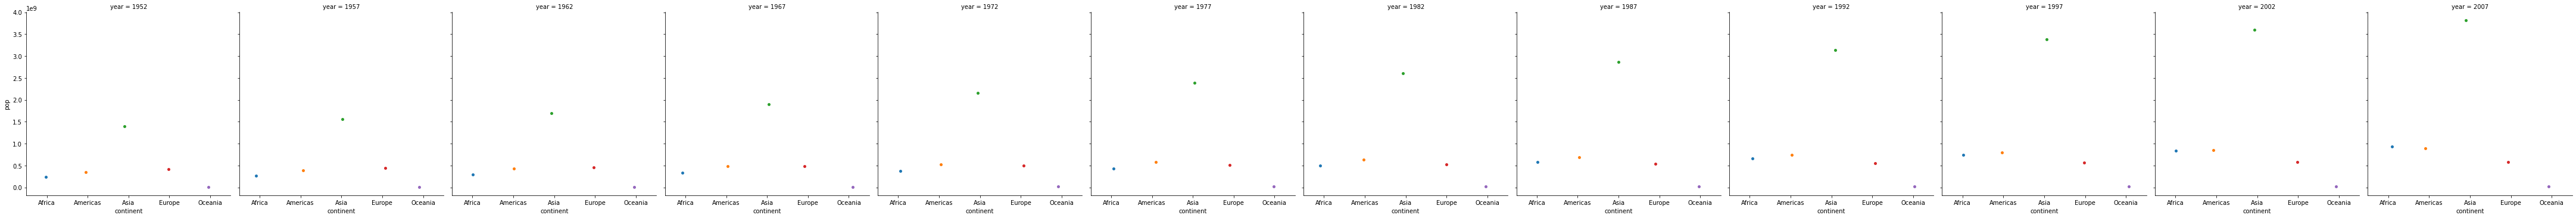

In [14]:
sns.catplot(x='continent', y='pop', col='year', data=df5)
plt.show()